# Visualization of long-term SSE model outputs
## Goal: 

Identify SSE episodes based on slip rate and cut model output, e.g. slip rate, shear tracton, etc, into small pieces named by event number.  

## Input:

Model output binary data start with "slipz1_" and end with ".dat"

## Output:

figures: maximum slip rate and final fault slip
snapshots: slip rate
pieces of data: slip rate, shear traction and final fault slip

### Authorship
D. Li, 27.10.2021
email: dli@geophysik.uni-muenchen.de

In [5]:
# initialize and load modules
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import pyproj
import scipy.io as sio
from scipy import spatial
# from cmcrameri import cm
from scipy.io import netcdf_file as netcdf

import matplotlib 
matplotlib.rc('xtick', labelsize=9) 
matplotlib.rc('ytick', labelsize=9)

print('finish module loading')

finish module loading


<IPython.core.display.Javascript object>


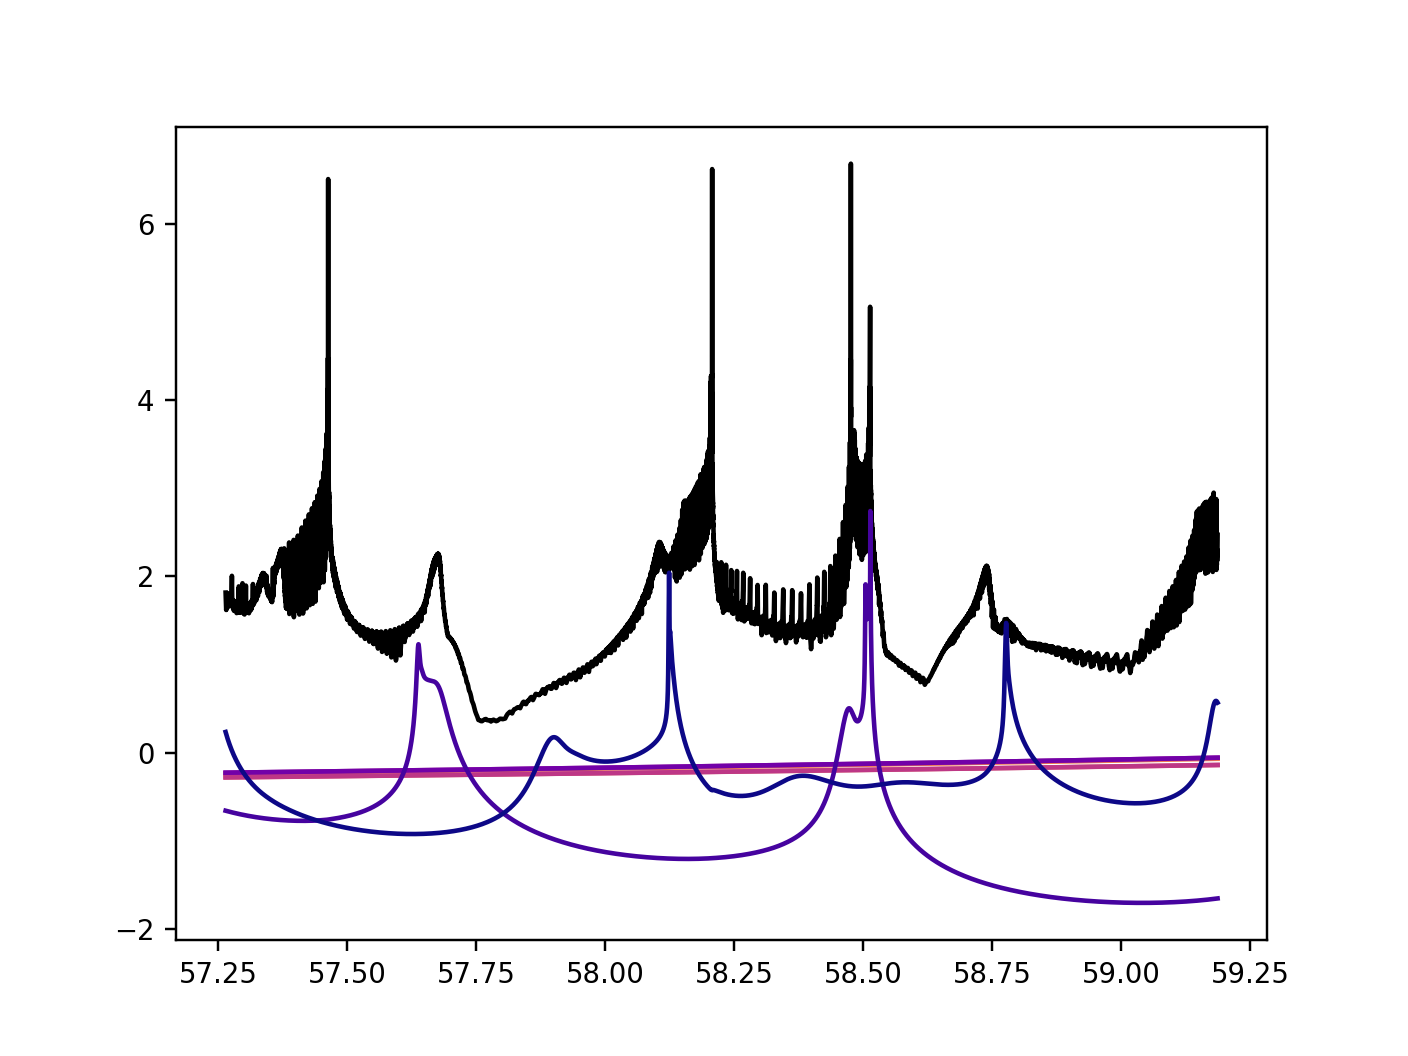

In [4]:
# plot max slip rate on the entire fault

# set folder, model name and appendix
# modelname = 'SSE2_2/'
# folder = '/Volumes/LINUX_GOFAR/guillimin/Model24_450/'
folder = '/Volumes/LINUX_GOFAR/Geosphere/Model24_all/'
modelname = 'seff2_9/'
appendix = '-h5_ef20_s25s41.dat'

# modelname = 'seff2_13/'

# maximum slip rate and SR at observation points.
fmaxv = np.loadtxt(folder + modelname +'maxv'+ appendix )
fmaxs1= np.loadtxt(folder + modelname +'maxv_150'+appendix )
fmaxs2= np.loadtxt(folder + modelname +'maxv_250'+appendix )
fmaxs3= np.loadtxt(folder + modelname +'maxv_300'+appendix )
fmaxs4= np.loadtxt(folder + modelname +'maxv_350'+appendix )
fmaxs5= np.loadtxt(folder + modelname +'maxv_400'+appendix )
fmaxs6= np.loadtxt(folder + modelname +'maxv_400'+appendix )
fmaxs7= np.loadtxt(folder + modelname +'maxv_50'+appendix )
fmaxs8= np.loadtxt(folder + modelname +'maxv_200'+appendix )

# set colormap
number = 10
cmap = plt.get_cmap('plasma_r')
colors = [cmap(i) for i in np.linspace(0, 1, number)]
colors = colors[1:]

# plot and save fig
plt.figure()
plt.plot(fmaxv[:,0],fmaxv[:,1],'-k')
# plt.plot(fmaxv[:,0],fmaxs1[:],color=colors[1])
plt.plot(fmaxv[:,0],fmaxs2[:],color=colors[2])
plt.plot(fmaxv[:,0],fmaxs3[:],color=colors[3])
plt.plot(fmaxv[:,0],fmaxs4[:],color=colors[4])
plt.plot(fmaxv[:,0],fmaxs5[:],color=colors[5])
plt.plot(fmaxv[:,0],fmaxs6[:],color=colors[6])
plt.plot(fmaxv[:,0],fmaxs7[:],color=colors[7])
plt.plot(fmaxv[:,0],fmaxs8[:],color=colors[8])

# plt.xlim((300,500))

plt.show()
outname = folder + modelname + 'maxv2'+'.png'
plt.savefig(outname,dpi=100,transparent=False)

In [9]:
# load geometry and mesh 

vertex = np.loadtxt(folder + 'vertex2.txt')
connect = np.loadtxt(folder + 'cell3.txt')

# data1 = np.loadtxt(folder + '/vertex.txt')
# data2 = np.loadtxt(folder + '/cell_107200.txt')
# vertex = data1/1e3
# connect = data2-1

nvex = len(vertex[:,1])
ncell = len(connect[:,1])

miu = 30e+9;
coeff = 1e+6;
vpl = 41/1000/365/24/3600;
yrs = 365*24*3600 ;

print('load geometry and triangular mesh')

# create triangular mesh
xr = vertex[:,0]
yr = vertex[:,1]
triang = tri.Triangulation(xr,yr,connect)

bb = np.array([xr,yr])
print(bb.shape,ncell)

load geometry and triangular mesh
(2, 55613) 110256


In [10]:
# set Cartesian-to-geographic projection, if necessary
# myproj = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
# lla = pyproj.Proj(proj='utm',zone='11N',ellps='WGS84', datum='WGS84')
# # trench = np.loadtxt('/import/deadlock-data/dli/Mexico/Launch_SeisSol/trench.txt')
# # epi = np.loadtxt('/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/2014EQ/2014Eq_USGS.txt')
# # aft = np.loadtxt('/import/schreck-data/dli/Mexico/Launch_Seissol/smallslab/2014EQ/2014Eq_aftershock.txt')

# # transform coordinates
# refer =  [2211956.564907321, 2065452.360267957]
# xx = vertex[:,0]*1e3 
# yy = vertex[:,1]*1e3

# # rotate
# theta = -65/180*np.pi

# x1 = np.cos(theta)*xx + np.sin(theta)*yy;
# y1 = -np.sin(theta)*xx + np.cos(theta)*yy;
# x2 = x1+refer[0]
# y2 = y1+refer[1]

# # project
# coords = pyproj.transform(lla, myproj, x2,y2, x2-x2, radians=False)
# xr = coords[0]
# yr = coords[1]

# triang = tri.Triangulation(xr,yr,connect)

# bb = np.array([xr,yr])
# print(bb.shape)
# print(npoint)

In [26]:
# find timing for SSE event
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
tfile = np.loadtxt(folder + modelname + '/t_sse'+ appendix);

# vpl = np.log10(42)
# data = np.where(fmaxs1 > 1*vpl)

dtsse = tfile[1:] - tfile[0:-1]

# identify individual events if separated by 15 days. 
data = np.where(dtsse > 2.1/365)
T2=data[0]

neve = T2.shape[0]
print(neve)

T1 = np.append(0,T2[0:-1])
twin = np.array([T1,T2,T2-T1+1])

np.savetxt(folder + modelname + 't_sse.txt',twin.transpose())
print(twin)

53
[[  0  53  55  83  84  85  86  87  88  91  92  93  95  96  97  99 100 101
  103 104 105 106 107 108 109 110 112 114 115 120 216 219 220 222 224 226
  228 229 230 231 233 265 272 276 277 279 280 281 282 284 290 291 293]
 [ 53  55  83  84  85  86  87  88  91  92  93  95  96  97  99 100 101 103
  104 105 106 107 108 109 110 112 114 115 120 216 219 220 222 224 226 228
  229 230 231 233 265 272 276 277 279 280 281 282 284 290 291 293 299]
 [ 54   3  29   2   2   2   2   2   4   2   2   3   2   2   3   2   2   3
    2   2   2   2   2   2   2   3   3   2   6  97   4   2   3   3   3   3
    2   2   2   3  33   8   5   2   3   2   2   2   3   7   2   3   7]]


In [27]:
# read binary file and cut into files dataSR... and dataTau...
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
ncell = 110256
sfilename = folder + modelname + '/slipz1_sse'+appendix
sfile = open(sfilename,mode='rb')
discard = np.fromfile(sfile,count=1,dtype='int32') 
# if startting point is not ieve=0
# discard = np.fromfile(sfile,count=2*twin[1,40]*ncell,dtype='<f8') 

## extract shear traction dataTau
tfilename = folder + modelname + '/slipz1_tau'+appendix
tfile = open(tfilename,mode='rb')
discard = np.fromfile(tfile,count=1,dtype='int32') 
# # if startting point is not ieve=0
# discard = np.fromfile(tfile,count=2*twin[1,40]*ncell,dtype='<f8') 


# begin to loop for plotting snaps of slip rate
for ieve in range(0,neve):
    nbegin = twin[0,ieve]
    nend = twin[1,ieve]
    nlength= twin[2,ieve]*2
    print(nbegin, nend, nlength)
    
    if (twin[2,ieve] < 29) :
        print('not applicable')
        continue 
    else:
        print(ieve)

    rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')
    rawdata1 = np.fromfile(tfile,count=nlength*ncell,dtype='<f8')
    
    sr = rawdata0[::2]
    tau= rawdata1[::2]

    outname = folder + modelname +'data/dataSR'+ str(ieve)+ '.bin'
    outname1= folder + modelname + 'data/dataTau'+ str(ieve)+ '.bin'
    f1 = open(outname,'wb+')
    f2 = open(outname1,'wb+')
    
    f1.write(bytearray(sr))
    f2.write(bytearray(tau))
    print('done '+ str(ieve))

sfile.close()
tfile.close()

0 53 108
0
done 0
53 55 6
not applicable
55 83 58
2
done 2
83 84 4
not applicable
84 85 4
not applicable
85 86 4
not applicable
86 87 4
not applicable
87 88 4
not applicable
88 91 8
not applicable
91 92 4
not applicable
92 93 4
not applicable
93 95 6
not applicable
95 96 4
not applicable
96 97 4
not applicable
97 99 6
not applicable
99 100 4
not applicable
100 101 4
not applicable
101 103 6
not applicable
103 104 4
not applicable
104 105 4
not applicable
105 106 4
not applicable
106 107 4
not applicable
107 108 4
not applicable
108 109 4
not applicable
109 110 4
not applicable
110 112 6
not applicable
112 114 6
not applicable
114 115 4
not applicable
115 120 12
not applicable
120 216 194
29
done 29
216 219 8
not applicable
219 220 4
not applicable
220 222 6
not applicable
222 224 6
not applicable
224 226 6
not applicable
226 228 6
not applicable
228 229 4
not applicable
229 230 4
not applicable
230 231 4
not applicable
231 233 6
not applicable
233 265 66
40
done 40
265 272 16
not appli

53 55 6
3.0
not applicable
55 83 58
29.0
[59, 63, 67, 71, 75, 82]


<IPython.core.display.Javascript object>


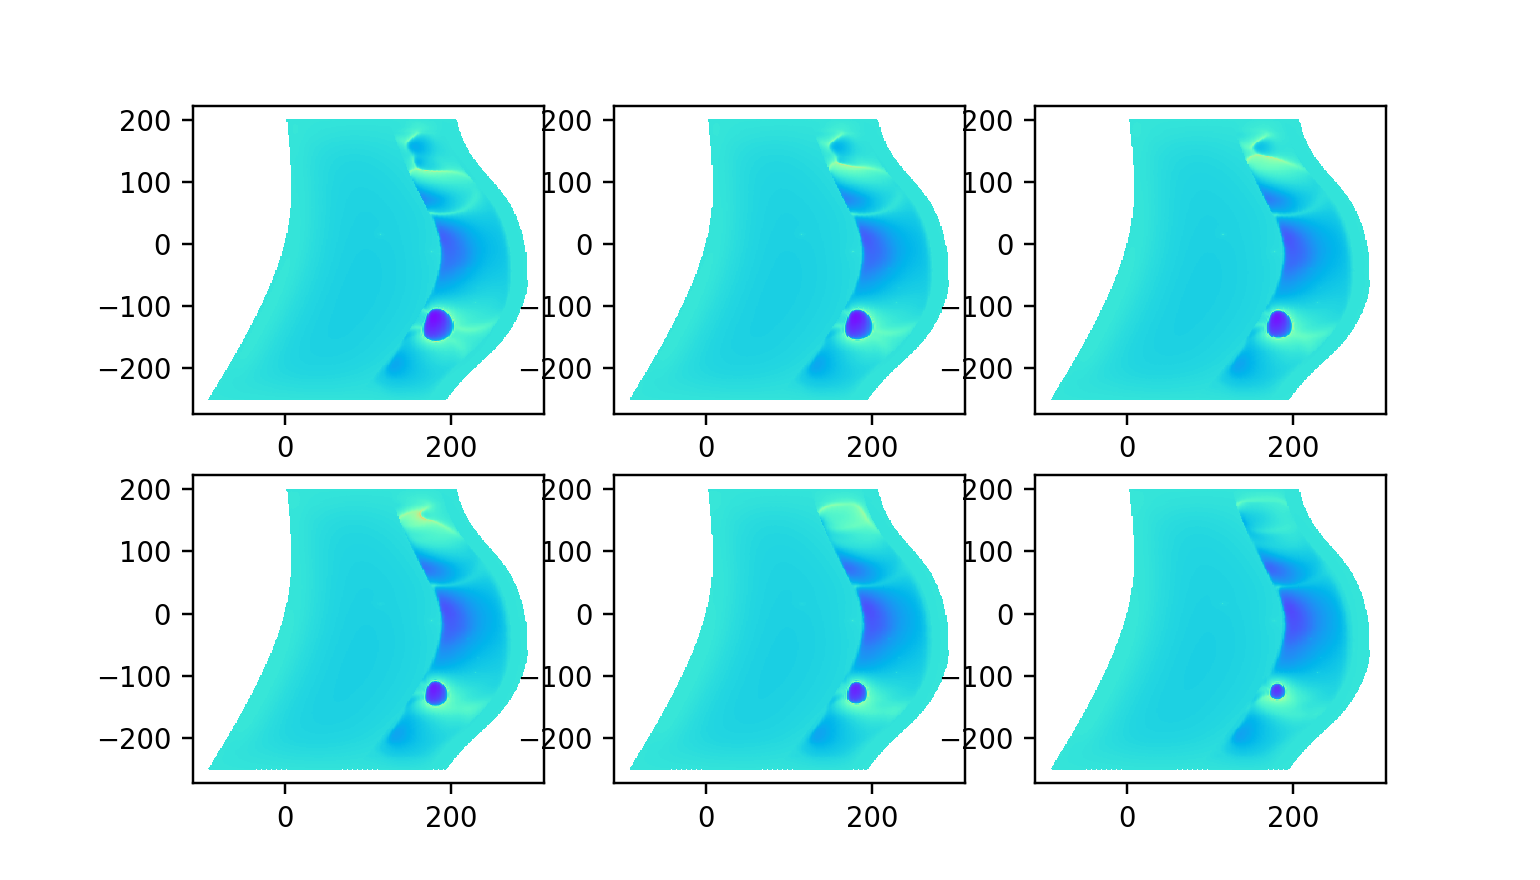

83 84 4
2.0
not applicable
84 85 4
2.0
not applicable
85 86 4
2.0
not applicable
86 87 4
2.0
not applicable
87 88 4
2.0
not applicable
88 91 8
4.0
not applicable
91 92 4
2.0
not applicable
92 93 4
2.0
not applicable
93 95 6
3.0
not applicable
95 96 4
2.0
not applicable
96 97 4
2.0
not applicable
97 99 6
3.0
not applicable
99 100 4
2.0
not applicable
100 101 4
2.0
not applicable
101 103 6
3.0
not applicable
103 104 4
2.0
not applicable
104 105 4
2.0
not applicable
105 106 4
2.0
not applicable
106 107 4
2.0
not applicable
107 108 4
2.0
not applicable
108 109 4
2.0
not applicable
109 110 4
2.0
not applicable
110 112 6
3.0
not applicable
112 114 6
3.0
not applicable
114 115 4
2.0
not applicable
115 120 12
6.0
not applicable
120 216 194
97.0
[136, 152, 168, 184, 200, 215]


<IPython.core.display.Javascript object>


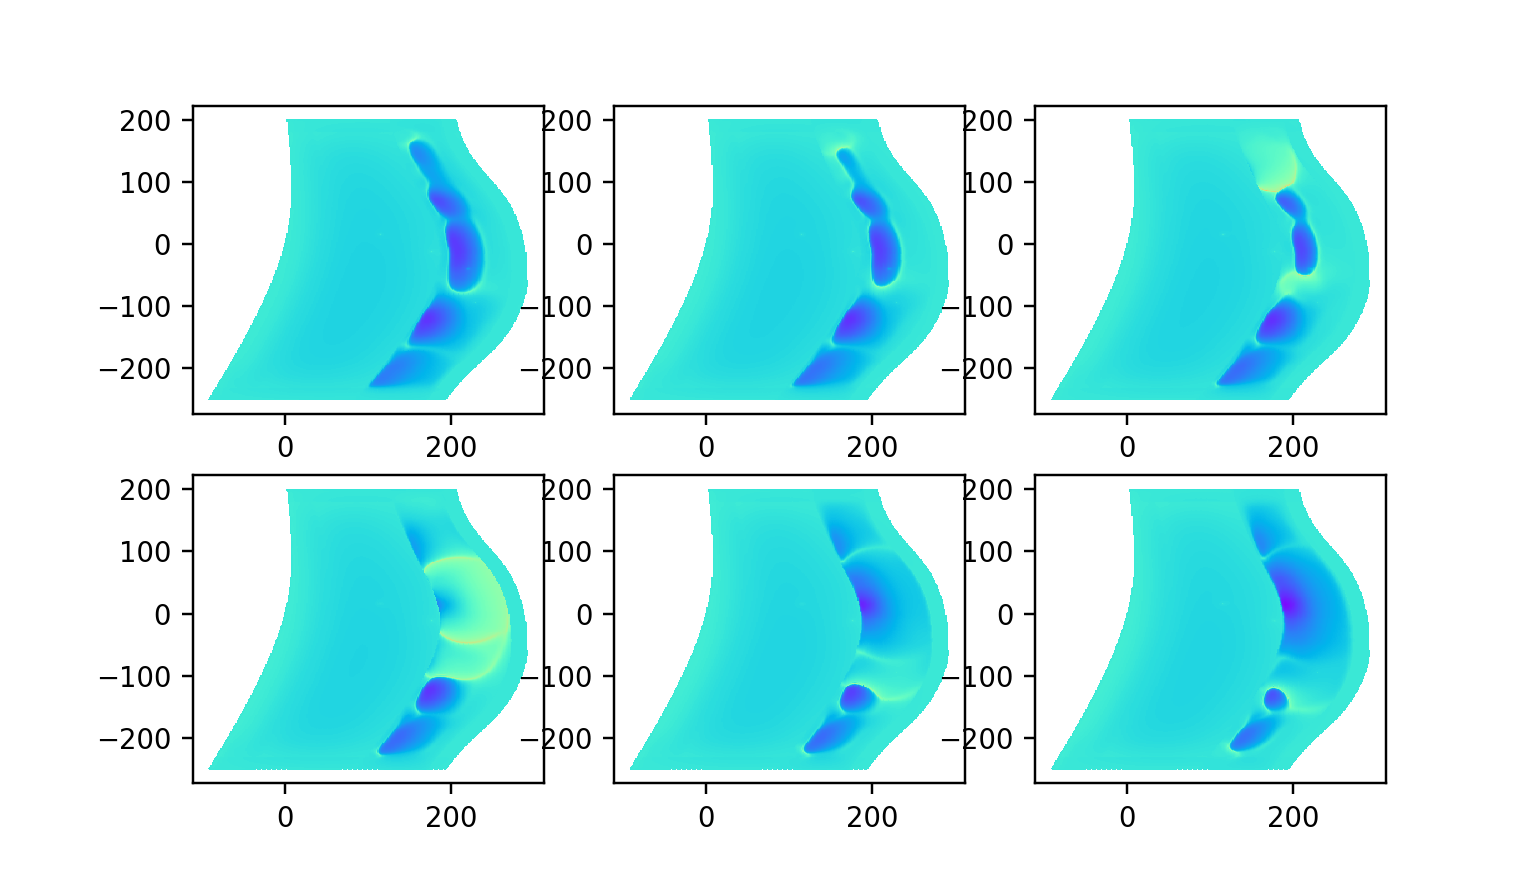

216 219 8
4.0
not applicable
219 220 4
2.0
not applicable
220 222 6
3.0
not applicable
222 224 6
3.0
not applicable
224 226 6
3.0
not applicable
226 228 6
3.0
not applicable
228 229 4
2.0
not applicable
229 230 4
2.0
not applicable
230 231 4
2.0
not applicable
231 233 6
3.0
not applicable
233 265 66
33.0
[238, 243, 248, 253, 258, 264]


<IPython.core.display.Javascript object>


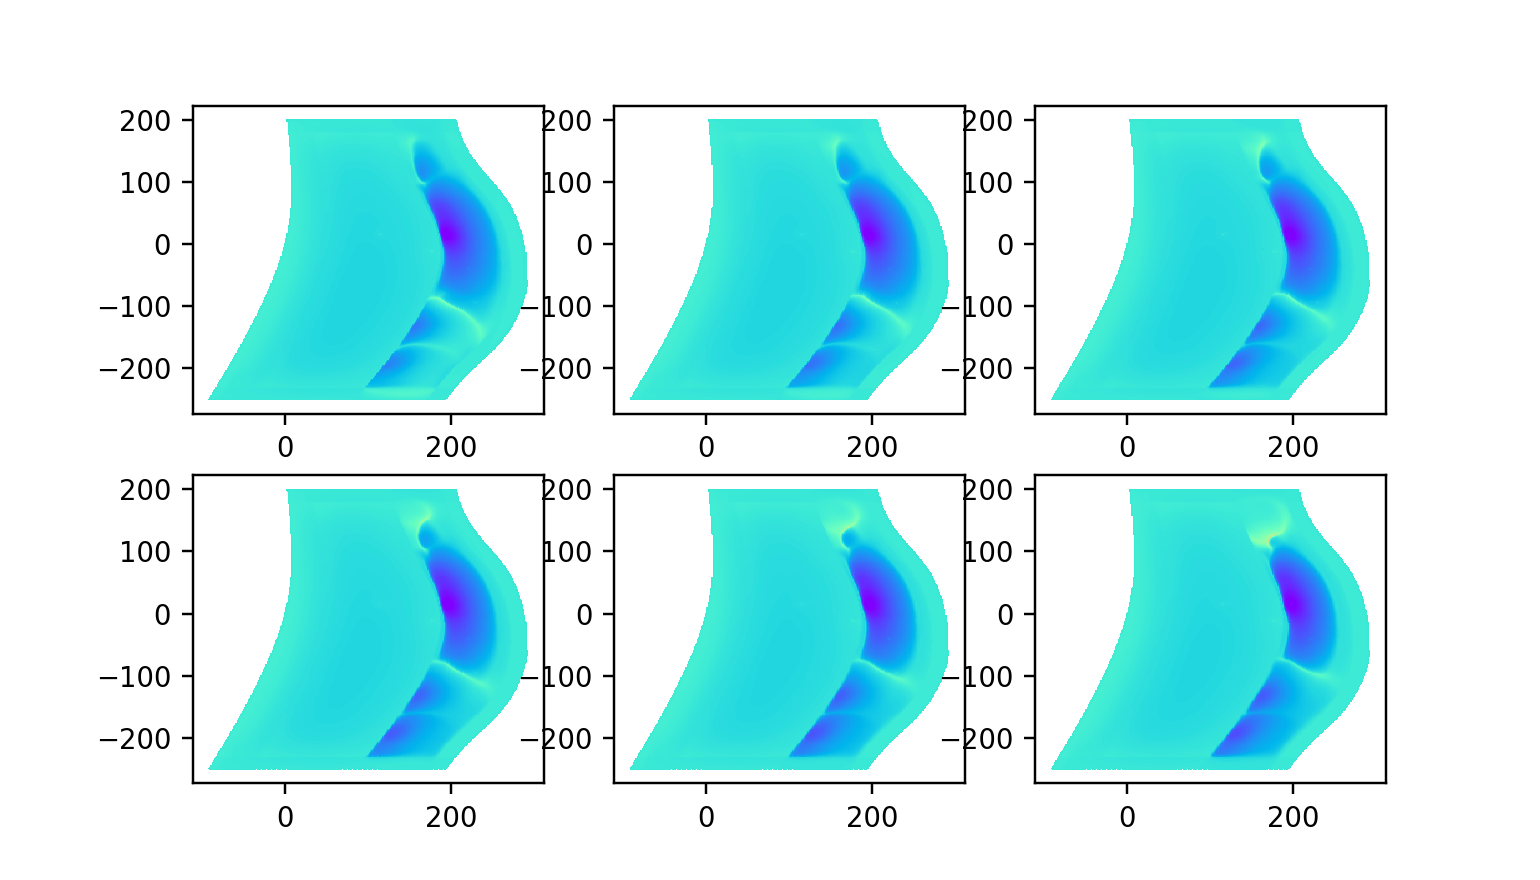

265 272 16
8.0
not applicable
272 276 10
5.0
not applicable
276 277 4
2.0
not applicable
277 279 6
3.0
not applicable
279 280 4
2.0
not applicable
280 281 4
2.0
not applicable
281 282 4
2.0
not applicable
282 284 6
3.0
not applicable
284 290 14
7.0
not applicable
290 291 4
2.0
not applicable
291 293 6
3.0
not applicable
293 299 14
7.0
not applicable


In [30]:
# read binary file
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
tfile = np.loadtxt(folder + modelname + '/t_sse'+appendix);

sfilename = folder + modelname + '/slipz1_sse'+appendix
sfile = open(sfilename,mode='rb')
discard = np.fromfile(sfile,count=1,dtype='int32') 
# if startting point is not ieve=0
# discard = np.fromfile(sfile,count=twin[1,2]*2*ncell,dtype='<f8') 

# begin to loop for plotting snaps of slip rate
for ieve in range(1,neve):
    
    nbegin = twin[0,ieve]
    nend = twin[1,ieve]
    nlength= twin[2,ieve]*2
    print(nbegin, nend, nlength)

    rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')    
    sr = rawdata0[0::2]
    print(sr.shape[0]/ncell)
    
    if (twin[2,ieve] < 29) :
        print('not applicable')
        continue 
    else:
        step = np.int(twin[2,ieve]/6)
        pp = [twin[0,ieve]+step, twin[0,ieve]+2*step,twin[0,ieve]+3*step,
          twin[0,ieve]+4*step,twin[0,ieve]+5*step,twin[1,ieve]-1]
    
    print(pp)

    yrs = 365
    dt = tfile[pp] - tfile[pp[0]]
    dt = dt*yrs 

    vcos = np.zeros((6,ncell))
    #stress = np.zeros((6,ncell))

    for i in range(0,6):
        jj = pp[i] - twin[0,ieve]
        vcos[i,:] = sr[jj*ncell-ncell:jj*ncell]
    #    stress[i,:]=0.5*sr0[jj*ncell-ncell:jj*ncell]+ 0.5*sr0[jj*ncell:jj*ncell+ncell]

    srmax=-5 
    
    fig,([ax0,ax1,ax2],[ax3,ax4,ax5]) = plt.subplots(nrows=2,ncols=3,figsize=(7,4))

    sc = ax0.tripcolor(triang,vcos[0,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
#     ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax0.text(-102, 16.7, 'day '+str(np.floor(dt[0])),fontsize=12);

    sc = ax1.tripcolor(triang,vcos[1,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax1.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax1.text(-102, 16.7, 'day '+str(np.floor(dt[1])),fontsize=9);

    sc = ax2.tripcolor(triang,vcos[2,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax2.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax2.text(-102, 16.7, 'day '+str(np.floor(dt[2])),fontsize=9);

    sc = ax3.tripcolor(triang,vcos[3,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax3.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax3.text(-102, 16.7, 'day '+str(np.floor(dt[3])),fontsize=9);

    sc = ax4.tripcolor(triang,vcos[4,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax4.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax4.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax4.text(-102, 16.7, 'day '+str(np.floor(dt[4])),fontsize=9);

    sc = ax5.tripcolor(triang,vcos[5,:], cmap='rainbow',shading='flat',vmin=-11,vmax=srmax)
    # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax5.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax5.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     # ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)
#     ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)


    plt.show()
    outname =folder + modelname +  'snapshots/snap_sr'+ str(ieve)+ '.png'
    plt.savefig(outname,dpi=100,transparent=False)


sfile.close()

0 53 108
54.0
42.58911119190062 0.03740538471899216


<IPython.core.display.Javascript object>


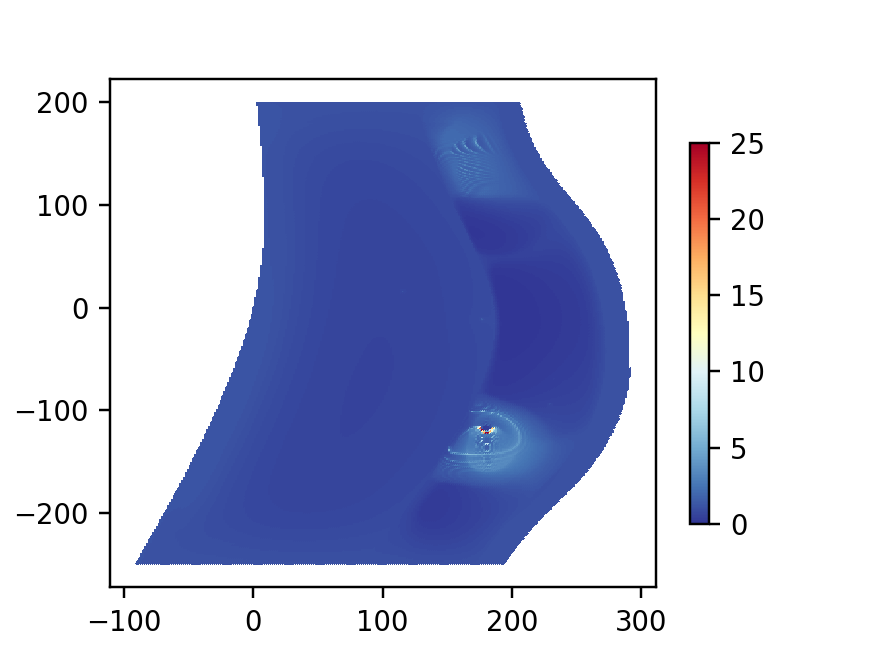

53 55 6
3.0
not applicable
55 83 58
29.0
4.704001067403182 0.012165325686163467


<IPython.core.display.Javascript object>


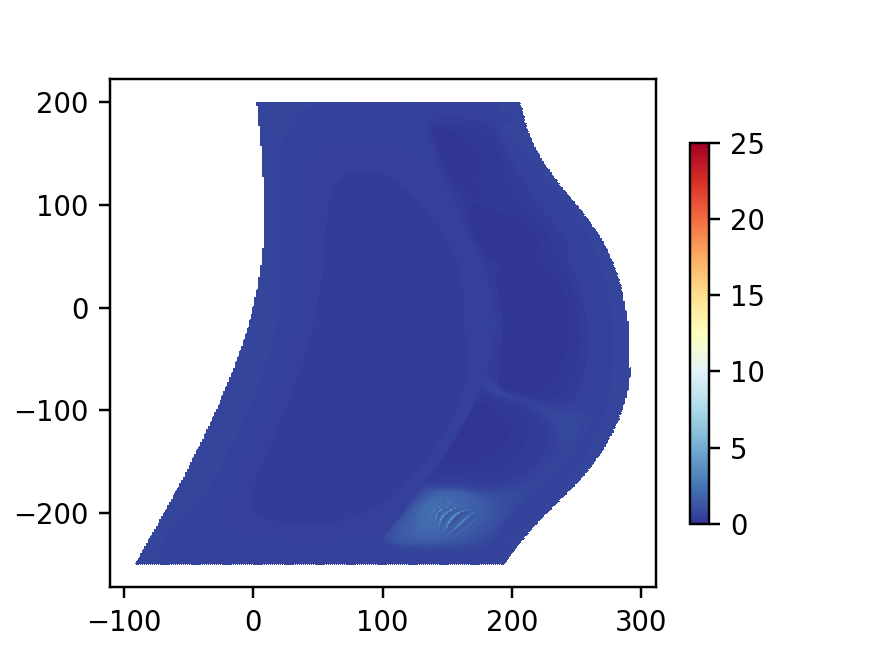

83 84 4
2.0
not applicable
84 85 4
2.0
not applicable
85 86 4
2.0
not applicable
86 87 4
2.0
not applicable
87 88 4
2.0
not applicable
88 91 8
4.0
not applicable
91 92 4
2.0
not applicable
92 93 4
2.0
not applicable
93 95 6
3.0
not applicable
95 96 4
2.0
not applicable
96 97 4
2.0
not applicable
97 99 6
3.0
not applicable
99 100 4
2.0
not applicable
100 101 4
2.0
not applicable
101 103 6
3.0
not applicable
103 104 4
2.0
not applicable
104 105 4
2.0
not applicable
105 106 4
2.0
not applicable
106 107 4
2.0
not applicable
107 108 4
2.0
not applicable
108 109 4
2.0
not applicable
109 110 4
2.0
not applicable
110 112 6
3.0
not applicable
112 114 6
3.0
not applicable
114 115 4
2.0
not applicable
115 120 12
6.0
not applicable
120 216 194
97.0
245.27600115378632 0.32604753817563137


<IPython.core.display.Javascript object>


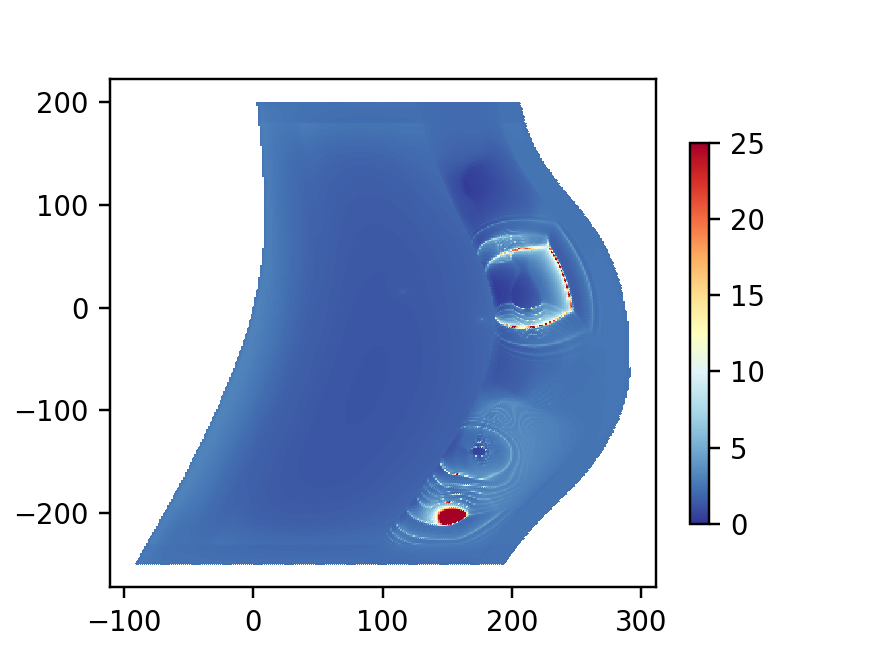

216 219 8
4.0
not applicable
219 220 4
2.0
not applicable
220 222 6
3.0
not applicable
222 224 6
3.0
not applicable
224 226 6
3.0
not applicable
226 228 6
3.0
not applicable
228 229 4
2.0
not applicable
229 230 4
2.0
not applicable
230 231 4
2.0
not applicable
231 233 6
3.0
not applicable
233 265 66
33.0
1.3357653991083505 0.004164937894527524


<IPython.core.display.Javascript object>


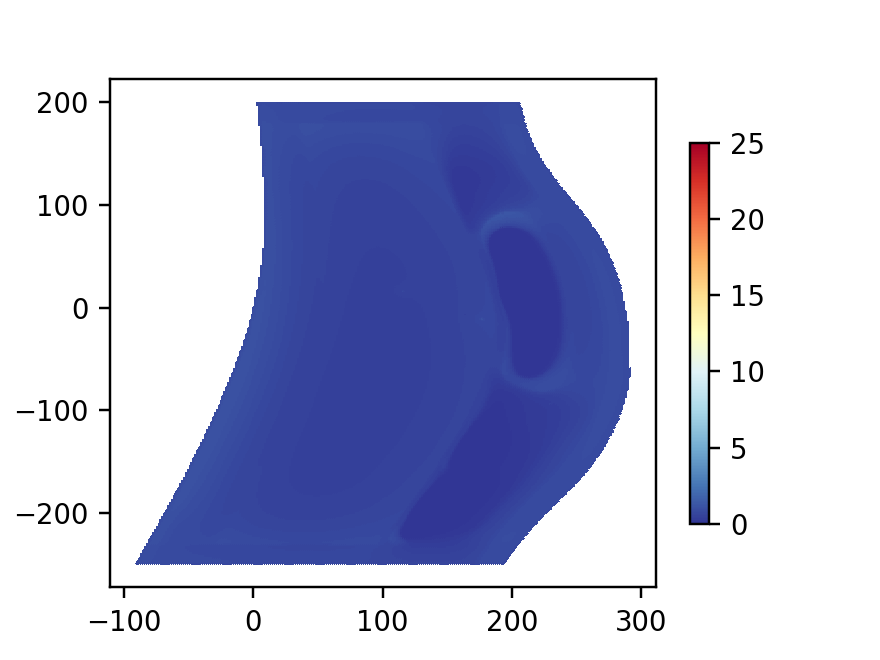

265 272 16
8.0
not applicable
272 276 10
5.0
not applicable
276 277 4
2.0
not applicable
277 279 6
3.0
not applicable
279 280 4
2.0
not applicable
280 281 4
2.0
not applicable
281 282 4
2.0
not applicable
282 284 6
3.0
not applicable
284 290 14
1.0
not applicable
290 291 4
0.0
not applicable
291 293 6
0.0
not applicable
293 299 14
0.0
not applicable


In [32]:
# calculate cumulative final slip and plot
# modelname = 'h90_N25_T2_May28/'
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
sfilename = folder + modelname + '/slipz1_sse'+appendix
tfile = np.loadtxt(folder + modelname + '/t_sse'+appendix);

sfile = open(sfilename,mode='rb')
discard = np.fromfile(sfile,count=1,dtype='int32') 

# begin to loop for plotting snaps of slip rate
for ieve in range(0,neve):
    
    nbegin = twin[0,ieve]
    nend = twin[1,ieve]
    nlength= twin[2,ieve]*2
    print(nbegin, nend, nlength)

    rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')    
    sr = rawdata0[::2]
    print(sr.shape[0]/ncell)
    
    if (twin[2,ieve] < 29) :
        print('not applicable')
        continue 
    else:
        step = np.int(twin[2,ieve]/6)
        pp = [twin[0,ieve]+step, twin[0,ieve]+2*step,twin[0,ieve]+3*step,
          twin[0,ieve]+4*step,twin[0,ieve]+5*step,twin[1,ieve]-1]
    
    dt =  tfile[twin[0,ieve]+1:twin[1,ieve]] - tfile[twin[0,ieve]:twin[1,ieve]-1]
    dt = dt*365*24*3600
    
    slp = np.zeros((ncell))
    
    for i in range(1,twin[2,ieve]-3):
        slp = slp + (0.5*10**sr[i*ncell-ncell:i*ncell]+0.5*10**sr[i*ncell+ncell:i*ncell+2*ncell])*dt[i]

    slp = slp*100
    print(slp.max(),slp.min())
    fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(4,3))

    sc = ax0.tripcolor(triang,slp, cmap='RdYlBu_r',shading='flat',vmin=0,vmax=25)
    cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
#     ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
    
    plt.show()
    
    outname = folder + modelname + 'snapshots/finalslip_'+str(ieve)+'.png'
    plt.savefig(outname,dpi=100,transparent=False)
    np.savetxt(folder + modelname + 'data/fault_slip_' + str(ieve)+'.txt',slp.transpose())


sfile.close()


In [ ]:
## plot snapshot of slip rate for a single event 
# print(ieve)
# print(sr.shape[0]/ncell)
# print(jj)
# print(i)

# ieve = 17

# nbegin = twin[0,ieve]
# nend = twin[1,ieve]
# nlength= twin[2,ieve]*2
# print(nbegin, nend, nlength)

# #rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')    
# #sr = rawdata0[::2]
# #print(sr.shape[0]/ncell)

# if ( twin[2,ieve] < 6) :
#     continue
# else:
#     step = np.int(twin[2,ieve]/6)
#     pp = [twin[0,ieve]+step, twin[0,ieve]+2*step,twin[0,ieve]+3*step,
#       twin[0,ieve]+4*step,twin[0,ieve]+5*step,twin[1,ieve]-1]

# print(pp)

# yrs = 365
# dt = tfile[pp] - tfile[pp[0]]
# dt = dt*yrs 

# vcos = np.zeros((6,ncell))
# #stress = np.zeros((6,ncell))

# for i in range(0,6):
#     jj = pp[i] - twin[0,ieve]
#     vcos[i,:] = sr[jj*ncell-ncell:jj*ncell]
# #    stress[i,:]=0.5*sr0[jj*ncell-ncell:jj*ncell]+ 0.5*sr0[jj*ncell:jj*ncell+ncell]

# fig,([ax0,ax1,ax2],[ax3,ax4,ax5]) = plt.subplots(nrows=2,ncols=3,figsize=(6.5,3))

# sc = ax0.tripcolor(triang,vcos[0,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
# ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax0.text(-102, 16.7, 'day '+str(np.floor(dt[0])),fontsize=12);

# sc = ax1.tripcolor(triang,vcos[1,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax1.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax1.text(-102, 16.7, 'day '+str(np.floor(dt[1])),fontsize=9);

# sc = ax2.tripcolor(triang,vcos[2,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax2.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax2.text(-102, 16.7, 'day '+str(np.floor(dt[2])),fontsize=9);

# sc = ax3.tripcolor(triang,vcos[3,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax3.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax3.text(-102, 16.7, 'day '+str(np.floor(dt[3])),fontsize=9);

# sc = ax4.tripcolor(triang,vcos[4,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax4.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax4.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# ax4.text(-102, 16.7, 'day '+str(np.floor(dt[4])),fontsize=9);

# sc = ax5.tripcolor(triang,vcos[5,:], cmap='rainbow',shading='flat',vmin=-10,vmax=-6)
# # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax5.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax5.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
# # ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)
# ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)


# plt.show()
# outname = 'snap_sr'+ str(ieve)+ '.png'
# plt.savefig(outname,dpi=100,transparent=False)

In [ ]:
# Make mapviews of variables: eff. normal stress, dc, a-b and a
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
# model = 'h90_N25_T1'
varfile = np.loadtxt(folder + modelname + '/vardep'+appendix);

depth = varfile[:,0];
eff = varfile[:,1]/10;
dc = varfile[:,2];
pab = varfile[:,3];
pa = varfile[:,4];

fig,([ax0,ax1],[ax3,ax4]) = plt.subplots(nrows=2,ncols=2,figsize=(6.5,4))

sc = ax0.tripcolor(triang,eff, cmap='rainbow',shading='flat')
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
# ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

sc = ax1.tripcolor(triang,dc, cmap='viridis',shading='flat')
cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
# ax1.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
sc = ax3.tripcolor(triang,pab, cmap='viridis',shading='flat')
cl = fig.colorbar(sc,ax=ax3,shrink=0.75)
# ax3.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

sc = ax4.tripcolor(triang,pa, cmap='viridis',shading='flat')
cl = fig.colorbar(sc,ax=ax4,shrink=0.75)
# ax4.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax4.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)


plt.show()
outname = folder + modelname + 'vardep'+'.png'
plt.savefig(outname,dpi=100,transparent=False)


In [ ]:
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
# sfilename = folder + modelname + '/slipz1-v-h90_N25_T2.dat'
# sfile = open(sfilename,mode='rb')
# discard = np.fromfile(sfile,count=1,dtype='int32') 
# # if startting point is not ieve=0
# #discard = np.fromfile(sfile,count=2*twin[1,12]*ncell,dtype='<f8') 

# # begin to loop for plotting snaps of slip rate
# for ieve in range(0,neve):
    
#     nbegin = twin[0]
#     nend = twin[1]
#     nlength= twin[2]*2
#     print(nbegin, nend, nlength)

#     rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')    
#     sr = rawdata0[::2]
#     print(sr.shape[0]/ncell)
    
#     if (twin[2] < 6) :
#         pp = [twin[0]+1, twin[0]+1,twin[0]+2,twin[0]+3, twin[0]+3, twin[0]+3 ]  
#         print('not applicable')
#         continue 
#     else:
#         step = np.int(twin[2]/6)
#         pp = [twin[0]+step, twin[0]+2*step,twin[0]+3*step,
#           twin[0]+4*step,twin[0]+5*step,twin[1]-1]
    
#     print(pp)

#     yrs = 365
#     dt = tfile[pp] - tfile[pp[0]]
#     dt = dt*yrs 

#     vcos = np.zeros((6,ncell))
#     #stress = np.zeros((6,ncell))

#     for i in range(0,6):
#         jj = pp[i] - twin[0]
#         vcos[i,:] = sr[jj*ncell-ncell:jj*ncell]
#     #    stress[i,:]=0.5*sr0[jj*ncell-ncell:jj*ncell]+ 0.5*sr0[jj*ncell:jj*ncell+ncell]

#     fig,([ax0,ax1,ax2],[ax3,ax4,ax5]) = plt.subplots(nrows=2,ncols=3,figsize=(6.5,3))

#     sc = ax0.tripcolor(triang,vcos[0,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
#     ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax0.text(-102, 16.7, 'day '+str(np.floor(dt[0])),fontsize=12);

#     sc = ax1.tripcolor(triang,vcos[1,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax1.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax1.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax1.text(-102, 16.7, 'day '+str(np.floor(dt[1])),fontsize=9);

#     sc = ax2.tripcolor(triang,vcos[2,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax2.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax2.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax2.text(-102, 16.7, 'day '+str(np.floor(dt[2])),fontsize=9);

#     sc = ax3.tripcolor(triang,vcos[3,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax3.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax3.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax3.text(-102, 16.7, 'day '+str(np.floor(dt[3])),fontsize=9);

#     sc = ax4.tripcolor(triang,vcos[4,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax4.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax4.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     ax4.text(-102, 16.7, 'day '+str(np.floor(dt[4])),fontsize=9);

#     sc = ax5.tripcolor(triang,vcos[5,:], cmap='viridis',shading='flat',vmin=-10,vmax=-1)
#     # cl = fig.colorbar(sc,ax=ax1,shrink=0.75)
#     ax5.set(xlim=(-102.5, -99),ylim=(16.5,19))
#     ax5.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)
#     # ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)
#     ax5.text(-102, 16.7, 'day '+str(np.floor(dt[5])),fontsize=9)


#     plt.show()
#     outname = 'snap_cosr'+ str(ieve)+ '.png'
#     plt.savefig(outname,dpi=100,transparent=False)


# sfile.close()

In [ ]:
# calculate cumulative final slip and plot of a single episode
# folder = '/import/freenas-m-05-seissol/dli/Mexico/Mesh_all_depth/'
# ieve = 17

# sfilename = folder + modelname + 'data/dataSR'+str(ieve)+'.bin'
# sfile = open(sfilename,mode='rb')

# tfile = np.loadtxt(folder + modelname + '/t_sse-'+appendix);

# # begin to loop for plotting snaps of slip rate

# nbegin = twin[0,ieve]
# nend = twin[1,ieve]
# nlength= twin[2,ieve]
# print(nbegin, nend, nlength)

# rawdata0 = np.fromfile(sfile,count=nlength*ncell,dtype='<f8')    
# sr = rawdata0[:]
# print(sr.shape[0]/ncell)

# dt =  tfile[twin[0,ieve]+1:twin[1,ieve]] - tfile[twin[0,ieve]:twin[1,ieve]-1]
# dt = dt*365*24*3600

# slp = np.zeros((ncell))

# for i in range(1,250):
#     slp = slp + (0.5*10**sr[i*ncell-ncell:i*ncell]+0.5*10**sr[i*ncell+ncell:i*ncell+2*ncell])*dt[i]

# slp = slp*100
# print(slp.max(),slp.min())
# fig,ax0 = plt.subplots(nrows=1,ncols=1,figsize=(4,3))

# sc = ax0.tripcolor(triang,slp, cmap='RdYlBu_r',shading='flat',vmin=0,vmax=25)
# cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
# ax0.set(xlim=(-102.5, -99),ylim=(16.5,19))
# ax0.plot(coast['ncst'][:,0],coast['ncst'][:,1],'-k',markersize=0.1)

# plt.show()
# outname = folder + modelname + 'snapshots/cumuslip_'+str(ieve)+'.png'
# plt.savefig(outname,dpi=100,transparent=False)

# sfile.close()